# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
print('X:{}, y:{}'.format(X.shape, y.shape))

X:(150, 4), y:(150,)


### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [3]:
y_ = pd.Series(y)
y_.value_counts() #check class data is balance or not.

2    50
1    50
0    50
dtype: int64

In [4]:
param_grid = {'n_estimators':list(range(100, 501, 100)), 'max_features':list(range(2, 4)),
              'max_depth':list(range(2, 4))}
clf = RandomForestClassifier()
cv_clf = GridSearchCV(clf, param_grid, cv=5, verbose=1)
cv_clf.fit(X, y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_features': [2, 3], 'max_depth': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [5]:
print(round(cv_clf.best_score_, 3), cv_clf.best_params_)
rf_clf = RandomForestClassifier(**cv_clf.best_params_)
rf_clf.fit(X, y)
y_pred = rf_clf.predict(X)


0.967 {'max_depth': 3, 'max_features': 2, 'n_estimators': 400}


C:\Users\crea\Anaconda3\envs\my_env\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


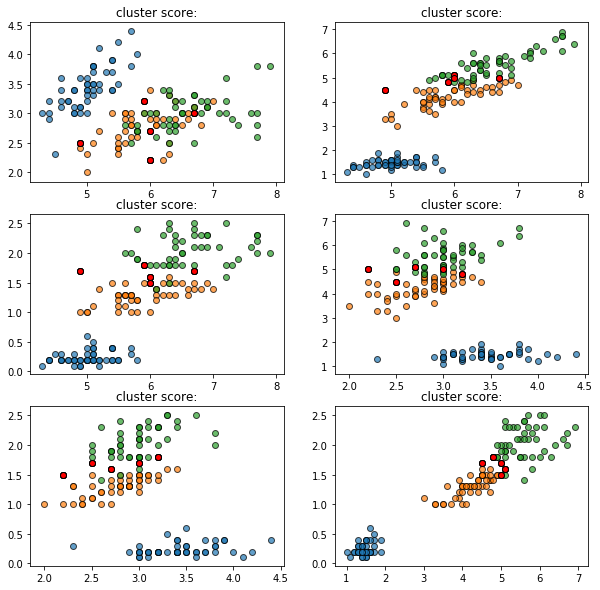

In [6]:
plt.figure(figsize=(10, 10))
error_pt =  X[:, :][y_pred != y]
f0 = (error_pt[:, 0])
f1 = (error_pt[:, 1])
f2 = (error_pt[:, 2])
f3 = (error_pt[:, 3])
for i in range(0, 3):
    feature0 = (X[:, 0][y==i])
    feature1 = (X[:, 1][y==i])
    feature2 = (X[:, 2][y==i])
    feature3 = (X[:, 3][y==i])
    
    feature_list = [(feature0, feature1),
                    (feature0, feature2),
                    (feature0, feature3),
                    (feature1, feature2),
                    (feature1, feature3),
                    (feature2, feature3)]
    
    cluster_list = [(f0, f1),
                    (f0, f2),
                    (f0, f3),
                    (f1, f2),
                    (f1, f3),
                    (f2, f3)]
    
    for idx in range(1, 7):
        plt.subplot(3, 2, idx)
        plt.scatter(feature_list[idx-1][0], feature_list[idx-1][1], edgecolors='k', alpha=0.7)
        plt.scatter(cluster_list[idx-1][0], cluster_list[idx-1][1], edgecolors='k', alpha=1, c='r')
        plt.title('cluster score:')
    

In [7]:
cluster = KMeans(n_clusters=3, random_state=1234)
cluster.fit(X)
labels = cluster.labels_
y, labels, silhouette_score(X, labels)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2

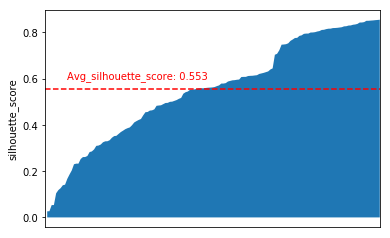

In [8]:
avg_cluster_score = silhouette_score(X, labels)
plt.fill_between(x= np.arange(1, 151), y1= sorted(silhouette_samples(X, labels)))
plt.text(10, avg_cluster_score+0.05, 'Avg_silhouette_score: '+str(round(silhouette_score(X, labels), 3)), {'color':'R'})
plt.hlines(avg_cluster_score, 0, X.shape[0], colors='R', linestyles='--')
plt.xlim(0, X.shape[0])
plt.ylabel('silhouette_score')
plt.xticks([])
plt.show()

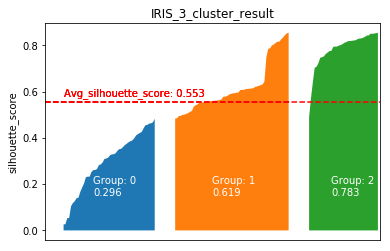

In [9]:
x_low=10
cluster_score = np.array(sorted(silhouette_samples(X, labels)))
avg_cluster_score = np.mean(cluster_score)

#print(avg_cluster_score)
for i in range(3):
    tmp_X = X[labels == i]
    tmp_labels = labels[labels==i] 
    tmp_score = np.array(sorted(cluster_score[labels==i]))
    avg_tmp_score = np.mean(tmp_score)
    plt.xlim(0, x_low+tmp_X.shape[0])
    plt.fill_between(np.arange(x_low, x_low + tmp_X.shape[0]), tmp_score)
    plt.hlines(avg_cluster_score, 0, x_low+tmp_X.shape[0], colors='R', linestyles='--')
    plt.text(x_low+tmp_X.shape[0]//3, 0.15, 'Group: ' + str(i) + '\n' +str(round(avg_tmp_score, 3)), {'color':'W'})
    plt.text(10, avg_cluster_score+0.03, 'Avg_silhouette_score: '+str(round(avg_cluster_score, 3)), {'color':'R'})
    plt.xticks([])
    plt.ylabel('silhouette_score')
    plt.title('IRIS_3_cluster_result')
    x_low += (tmp_X.shape[0] + 10)
    

C:\Users\crea\Anaconda3\envs\my_env\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


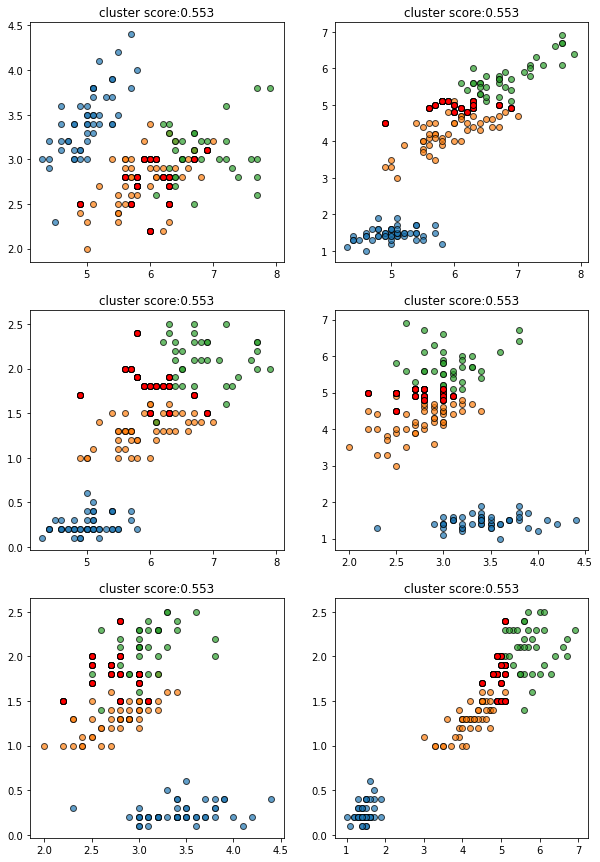

In [10]:
plt.figure(figsize=(10, 15))
error_pt =  X[:, :][labels != y]
f0 = (error_pt[:, 0])
f1 = (error_pt[:, 1])
f2 = (error_pt[:, 2])
f3 = (error_pt[:, 3])
for i in range(0, 3):
    feature0 = (X[:, 0][y==i])
    feature1 = (X[:, 1][y==i])
    feature2 = (X[:, 2][y==i])
    feature3 = (X[:, 3][y==i])
    feature_list = [(feature0, feature1),
                    (feature0, feature2),
                    (feature0, feature3),
                    (feature1, feature2),
                    (feature1, feature3),
                    (feature2, feature3)]
    cluster_list = [(f0, f1),
                    (f0, f2),
                    (f0, f3),
                    (f1, f2),
                    (f1, f3),
                    (f2, f3)]
    
    for idx in range(1, 7):
        plt.subplot(3, 2, idx)
        plt.scatter(feature_list[idx-1][0], feature_list[idx-1][1], edgecolors='k', alpha=0.7)
        plt.scatter(cluster_list[idx-1][0], cluster_list[idx-1][1], edgecolors='k', alpha=1, c='r')
        plt.title('cluster score:'+ str(round(avg_cluster_score, 3)))
